# 로지스틱 회귀 (이진 분류)

In [3]:
# 파이토치로 로지스틱 회귀 구현하기


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1)

In [5]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [9]:
# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))  ## 시그모이드 적용 (식으로)

hypothesis = torch.sigmoid(x_train.matmul(W) + b)   ## 시그모이드 적용 (토치 내장 함수로)

In [10]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


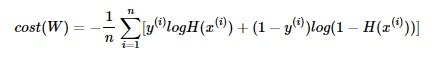

In [12]:
# Cost 함수 (값을 직접 구하기)

Cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))

In [14]:
print(Cost)
print(Cost.mean())

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)
tensor(0.6931, grad_fn=<MeanBackward0>)


In [16]:
# Cost 함수 (Torch 내장함수 사용)

Cost = F.binary_cross_entropy(hypothesis, y_train)

print(Cost)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)


In [20]:
### 모델링 전체 코드

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 데이터와 가중치  생성
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)


# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))  ## 시그모이드 적용 (식으로)
hypothesis = torch.sigmoid(x_train.matmul(W) + b)   ## 시그모이드 적용 (토치 내장 함수로)



# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    Cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    Cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, Cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
### nn.Module로 구현하는 로지스틱 회귀

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [24]:
# nn.Sequential() :  nn.Module 층을 차례로 쌓을 수 있도록 함

model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

print(model(x_train))

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)


In [1]:
### nn.Module을 활용한 전체 코드 구성

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)



# nn.Sequential() :  nn.Module 층을 차례로 쌓을 수 있도록 함
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)


# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [2]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


In [ ]:
### 클래스로 파이토치 모델 구현하기

In [ ]:

# 클래스를 사용한 모델 생성 코드  
# : 위와 같은 클래스를 사용한 모델 구현 형식은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지 필요
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))




# 클래스가 아닐때의 코드
    # model = nn.Sequential(
    #    nn.Linear(2, 1), # input_dim = 2, output_dim = 1
    #    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
    # )

In [12]:
## 전체 코드

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        #return self.sigmoid(self.linear(x))  # 이렇게 해도 됨

        model = nn.Sequential(self.linear, self.sigmoid)
        return(model(x))
    
    
torch.manual_seed(1)

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()


# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)           # 둘 다 가능
    hypothesis = model.forward(x_train)  # 둘 다 가능

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

# 소프트 맥스

### 교차 엔트로피 오차(Cross Entropy Error) - 이진 분류, 멀티클래스
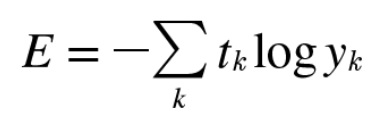

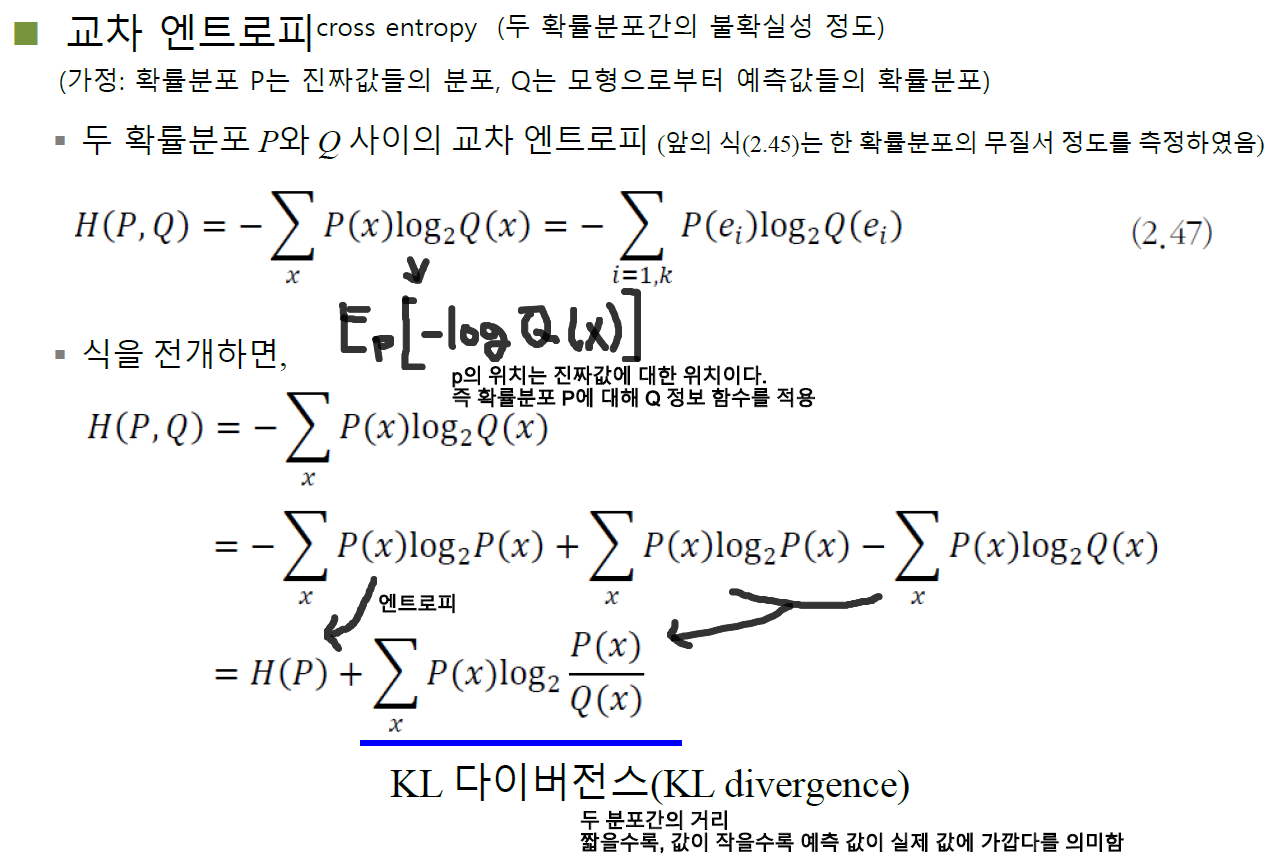

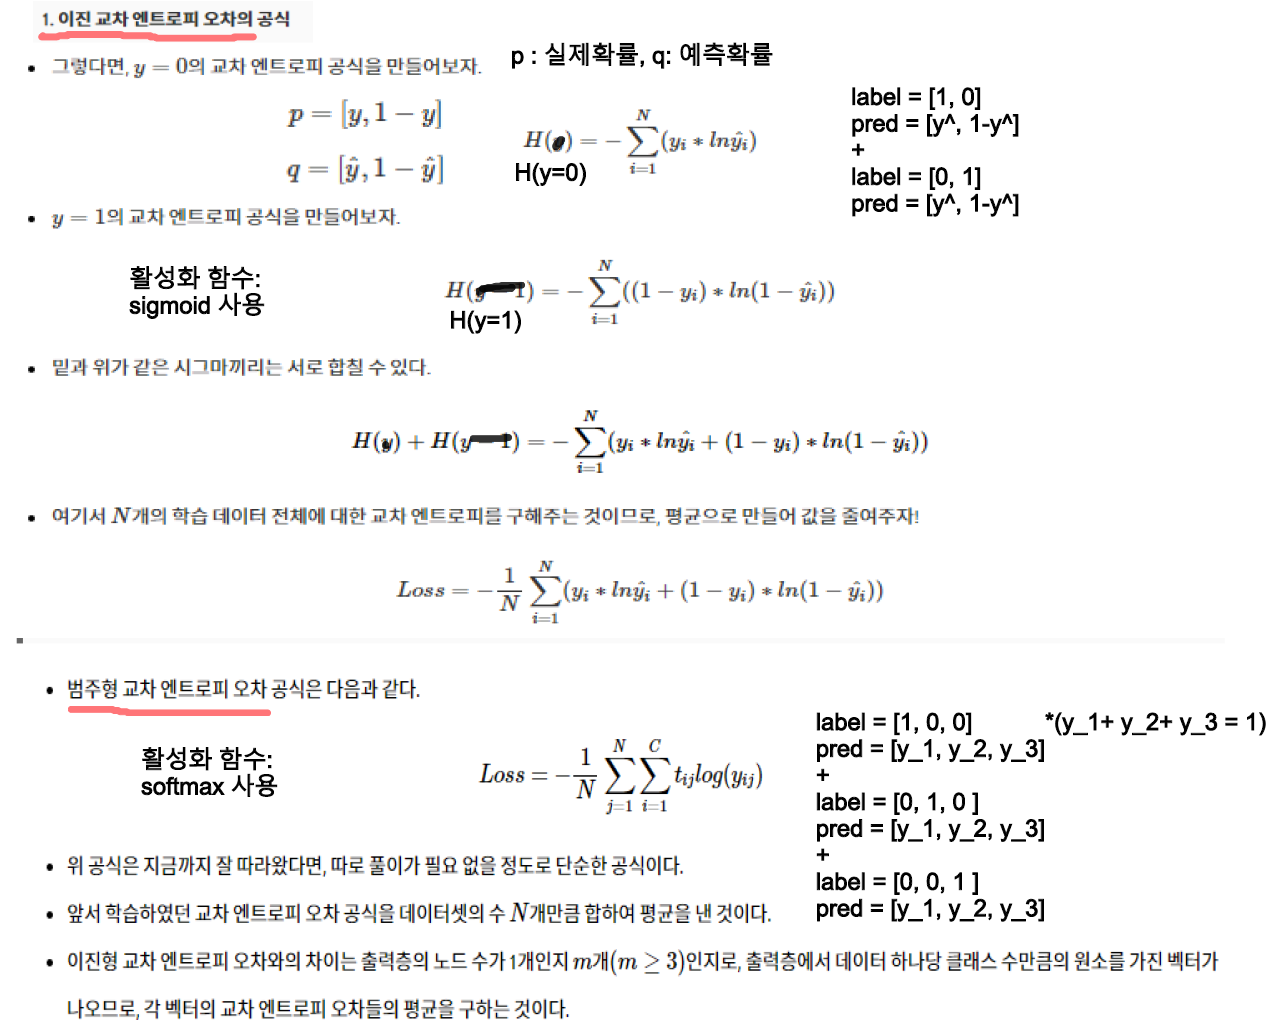

In [ ]:
### 소프트맥스 회귀의 비용 함수 구현하기

In [22]:
# 소프트 맥스 이해하기

z = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

# parameter : dim ( int ) – Softmax가 계산될 차원(따라서 dim을 따라 모든 슬라이스의 합은 1이 됨)
hypothesis = F.softmax(z, dim=1) # dim = 1이므로 열을 따라, sum = 1이됨

print(hypothesis)
print(hypothesis.sum())

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])
tensor(2.0000)


In [24]:
# 소프트 맥스 이해하기

z = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

# parameter : dim ( int ) – Softmax가 계산될 차원(따라서 dim을 따라 모든 슬라이스의 합은 1이 됨)
hypothesis = F.softmax(z, dim=0) # dim = 0이므로 행을 따라, sum = 1이됨

print(hypothesis)
print(hypothesis.sum())

tensor([[0.0474, 0.0474, 0.0474],
        [0.9526, 0.9526, 0.9526]])
tensor(3.)


In [25]:
# 소프트 맥스 이해하기

z = torch.FloatTensor([1, 2, 3])

hypothesis = F.softmax(z, dim=0)  # 2차원이 아니라 1차원이기 때문에 행만 존재함

print(hypothesis)
print(hypothesis.sum())

tensor([[1., 1., 1.]])
tensor(3.)


In [27]:
z = torch.rand(3, 5, requires_grad=True)

hypothesis = F.softmax(z, dim=1)

print(hypothesis)
print(hypothesis[0].sum())

tensor([[0.2974, 0.2244, 0.1595, 0.1420, 0.1767],
        [0.1509, 0.1595, 0.1917, 0.2522, 0.2457],
        [0.1002, 0.2226, 0.1878, 0.2624, 0.2271]], grad_fn=<SoftmaxBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)


In [29]:
y = torch.randint(5, (3,)).long()
print(y)


# randint()
# parameter :
# low (int, optional) – Lowest integer to be drawn from the distribution. Default: 0.
# high (int) – One above the highest integer to be drawn from the distribution.
# size (tuple) – a tuple defining the shape of the output tensor.

tensor([3, 1, 2])


In [33]:
src = torch.arange(1,11).reshape(2,5)
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [50]:
torch.zeros(3,5,dtype=src.dtype)

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [51]:
##   *** scatter_ 에 대한 이해 1 ***              # https://hongl.tistory.com/201
# : index를 활용해 새로운 tensor를 생성함. 

index = torch.tensor([[0,1,2,0,1]])
torch.zeros(3,5,dtype=src.dtype).scatter_(0, index, src)   # 0은 dim을 의미함 (아래 참조)

# 3차원
# if dim ==0 , tensor[index[i][j][k]][j][k] = src[i][j][k]  
# if dim ==1 , tensor[i][index[i][j][k]][k] = src[i][j][k]
# if dim ==2 , tensor[i][j][index[i][j][k]] = src[i][j][k]

# 2차원
# if dim ==0 , tensor[index[i][j]][j] = src[i][j]
# if dim ==1 , tensor[i][index[i][j]] = src[i][j]




tensor([[1, 0, 0, 4, 0],
        [0, 2, 0, 0, 5],
        [0, 0, 3, 0, 0]])

In [47]:
##   *** scatter_ 에 대한 이해 2 ***

index = torch.tensor([[0,1,2,0,1], [2,1,0,1,2]])
torch.zeros(3,5,dtype=src.dtype).scatter_(0, index, src)




tensor([[ 1,  0,  8,  4,  0],
        [ 0,  7,  0,  9,  5],
        [ 6,  0,  3,  0, 10]])

In [77]:
##   *** scatter_ 에 대한 이해 3 ***

y_index = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

y_one_hot = torch.zeros(8, 3)
print( y_one_hot.scatter_(1, y_index.unsqueeze(1), 1) )  # 숫자 1과 2는 브로드 캐스팅 적용됨

y_one_hot = torch.zeros(8, 3)
print( y_one_hot.scatter_(0, y_index.unsqueeze(1), 2) )  # 숫자 1과 2는 브로드 캐스팅 적용됨

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])
tensor([[2., 0., 0.],
        [2., 0., 0.],
        [2., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [59]:
# one hot 인코딩 만들기

y = torch.randint(5, (3,)).long()
print(y)


z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

y_one_hot = torch.zeros_like(hypothesis) 
print(y_one_hot.scatter_(1, y.unsqueeze(1), 1))   # .unsqueeze(1)를 통해 (3,) 행렬을 (3,1)로 바꿔줌 


tensor([0, 3, 2])
tensor([[0.2296, 0.1457, 0.1606, 0.2415, 0.2227],
        [0.1474, 0.1567, 0.2882, 0.1662, 0.2416],
        [0.2360, 0.1376, 0.1242, 0.3071, 0.1951]], grad_fn=<SoftmaxBackward0>)
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])


In [60]:
# softmax의 비용 함수 구현 (로우 레빌)

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
tensor(1.7839, grad_fn=<MeanBackward0>)


In [63]:
### 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)


z = torch.rand(3, 5, requires_grad=True)


# low level ( softmax + log )
torch.log(F.softmax(z, dim=1))
print(torch.log(F.softmax(z, dim=1)))

# hifh level ( log_softmax )
F.log_softmax(z, dim=1)
print(F.log_softmax(z, dim=1))

tensor([[-1.7784, -1.1961, -1.7393, -1.9326, -1.5688],
        [-1.5543, -1.3782, -2.1529, -1.7339, -1.4110],
        [-1.5700, -1.5897, -1.5460, -1.5851, -1.7722]], grad_fn=<LogBackward0>)
tensor([[-1.7784, -1.1961, -1.7393, -1.9326, -1.5688],
        [-1.5543, -1.3782, -2.1529, -1.7339, -1.4110],
        [-1.5700, -1.5897, -1.5460, -1.5851, -1.7722]],
       grad_fn=<LogSoftmaxBackward0>)


In [67]:


# Low Levl ( log_softmax )
print( (y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean() )
print(y_one_hot)


# mid level ( F.log_softmax() + F.nll_loss() )
print( F.nll_loss(F.log_softmax(z, dim=1), y) ) # nll_loss는 one_hot 인코딩 필요없이 바로 입력값을 index로 치환하여 계산함
print(y)                                        


# High level ( F.cross_entropy() )
print( F.cross_entropy(z, y) )   # F.cross_entropy는 비용 함수에 소프트맥스 함수를 포함하고 있음
                                 # y는 정답 인덱스로 이루어진 텐서

tensor(1.6861, grad_fn=<MeanBackward0>)
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])
tensor(1.6861, grad_fn=<NllLossBackward0>)
tensor([0, 3, 2])
tensor(1.6861, grad_fn=<NllLossBackward0>)


In [ ]:
### 소프트맥스 로지스틱 회귀분석 구현하기 (로우 레벨)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [68]:
## 원 핫 인코딩을 포함한 데이터 선언

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]     # 정답은 3개 중 1개
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [71]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)

tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [78]:
## 전체 코드

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)


## 원 핫 인코딩을 포함한 데이터 선언
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]     # 정답은 3개 중 1개
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)  # 원 핫 인코딩


# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)


nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [1]:
### 소프트맥스 회귀 구현하기(하이-레벨)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)


## 원 핫 인코딩을 포함한 데이터 선언
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]     # 정답은 3개 중 1개
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)    #  F.cross_entropy()는 원핫 인코딩 필요없음

# 모델 초기화
W = torch.zeros((4,3), requires_grad = True)
b = torch.zeros((8,1), requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W,b], lr = 0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1 ):
    
    # cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))    
    



Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [81]:
### 소프트맥스 회귀 nn.Module로 구현하기


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)


## 원 핫 인코딩을 포함한 데이터 선언
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]     # 정답은 3개 중 1개
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)    #  F.cross_entropy()는 원핫 인코딩 필요없음



# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)     # -> 가중치 4개와 bias 1개 존재

optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573444
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473266
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


In [87]:
list(model.parameters())

[Parameter containing:
 tensor([[-3.1120, -0.3276,  2.3522, -0.4711],
         [ 0.4027, -0.1933, -0.4841,  1.2384],
         [ 2.5657,  0.5388, -1.9292, -0.2536]], requires_grad=True),
 Parameter containing:
 tensor([-2.2920, -1.0112,  3.2545], requires_grad=True)]

In [89]:
### 소프트맥스 회귀 클래스로 구현하기


class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()



torch.manual_seed(1)

## 원 핫 인코딩을 포함한 데이터 선언
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]     # 정답은 3개 중 1개
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)    #  F.cross_entropy()는 원핫 인코딩 필요없음

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.366217
Epoch  100/1000 Cost: 0.722726
Epoch  200/1000 Cost: 0.637564
Epoch  300/1000 Cost: 0.578576
Epoch  400/1000 Cost: 0.527363
Epoch  500/1000 Cost: 0.479315
Epoch  600/1000 Cost: 0.432700
Epoch  700/1000 Cost: 0.386693
Epoch  800/1000 Cost: 0.340930
Epoch  900/1000 Cost: 0.295757
Epoch 1000/1000 Cost: 0.255350


In [ ]:
### MNIST 데이터 분류해보기

### 토치비전(torchvision) 소개

torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지입니다. 아래의 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여줍니다.

링크 : https://pytorch.org/vision/stable/

자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지가 있습니다.

In [105]:
# 분류기 구현을 위한 사전 설정

import torch
import torchvision as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random


USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [106]:
# 난수 seed 설정

random.seed(777)
torch.manual_seed(777)

if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [107]:
# hyperparameters

training_epochs = 15
batch_size = 100

In [119]:
# MNIST dataset


mnist_train = dsets.MNIST('./', download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                    ]), train=True)

mnist_test = dsets.MNIST(root='./',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

RuntimeError: File not found or corrupted.

In [101]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)